# Movie Revenue Prediction 

In [947]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.cluster import KMeans

In [948]:
movies_df=pd.read_csv(r'C:\Users\iamab\Documents\Jupyter Notebook\archive\tmdb_5000_movies.csv')
credits_df=pd.read_csv(r'C:\Users\iamab\Documents\Jupyter Notebook\archive\tmdb_5000_credits.csv')

In [949]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [950]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [951]:
credits_df.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [952]:
movies_df.fillna(value=0, axis=1, inplace=True)
movies_df.dropna(axis=0, inplace=True)
movies_df.drop_duplicates(keep="first", inplace=True)

In [953]:
movies_df.shape

(4803, 20)

In [954]:
useless_columns=['homepage', 'original_title', 'original_language', 'overview','spoken_languages',
                 'keywords', 'status', 'tagline','id']
movies_df.drop(useless_columns, inplace=True, axis=1)

In [955]:
movies_df.release_date = pd.to_datetime(movies_df['release_date'])
movies_df["year"] = movies_df.release_date.dt.year

In [956]:
movies_df.shape

(4803, 12)

In [957]:
movies_df.isnull().sum()

budget                  0
genres                  0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
year                    0
dtype: int64

In [958]:
movies_df=movies_df.merge(credits_df)

In [959]:
movies_df.shape

(4809, 15)

In [960]:
movies_df = movies_df.set_index("title")
movies_df=movies_df.reset_index()

In [961]:
change_columns = ['budget', 'revenue',"popularity", "runtime", "vote_average", "year"]
movies_df[change_columns]=movies_df[change_columns].applymap(np.int64)

In [962]:
movies_df.head()

,title,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,year,movie_id,cast,crew
0,Avatar,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,7,11800,2009,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,6,4500,2007,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,6,4466,2015,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,7,9106,2012,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,6,2124,2012,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [963]:
count_col=['year','vote_average','runtime']

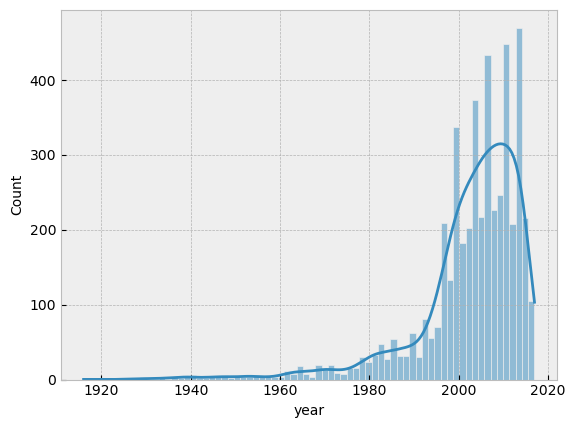

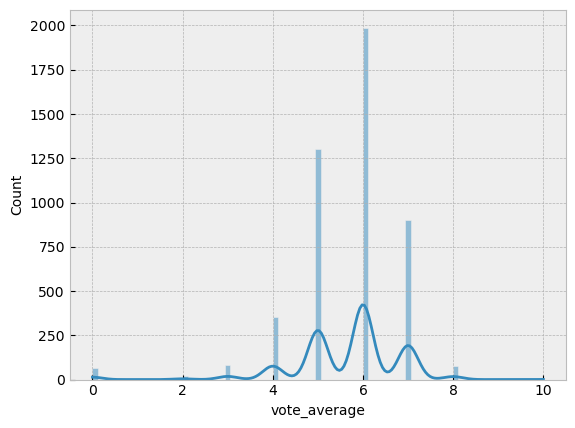

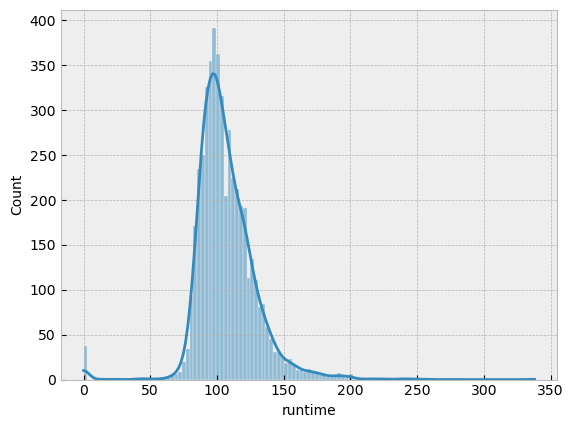

In [964]:
plt.style.use('bmh')
for i in count_col:
    sns.histplot(movies_df, x=i, stat='count', kde=True)
    plt.show()

<Axes: >

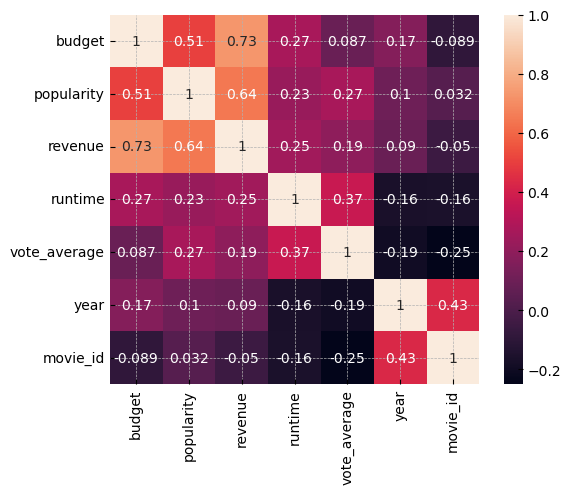

In [965]:
sns.heatmap(movies_df.corr(numeric_only=True), annot=True, vmax=1, square=True)

In [966]:
#sns.pairplot(movies_df, vars=['budget','revenue','year','runtime','popularity','vote_average'])
budget=movies_df['budget'].to_numpy()
revenue=movies_df['revenue'].to_numpy()
year=movies_df['year'].to_numpy()
runtime=movies_df['runtime'].to_numpy()
popularity=movies_df['popularity'].to_numpy()
vote_average=movies_df['vote_average'].to_numpy()

#correleted_cols=[budget,revenue,year,runtime,popularity,vote_average]
#for i in correleted_cols:
#    plt.scatter(i,revenue)
#    plt.xlabel(i)
#    plt.ylabel('Revenue')
#    plt.show()

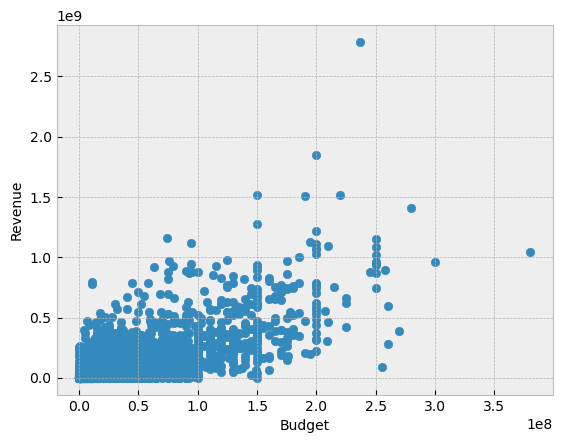

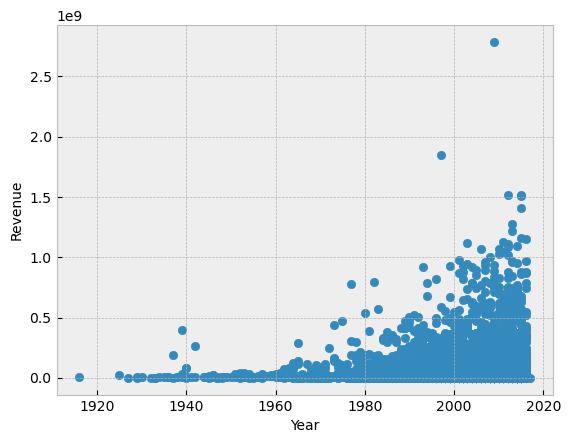

In [967]:
plt.scatter(budget,revenue)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

plt.scatter(year,revenue)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

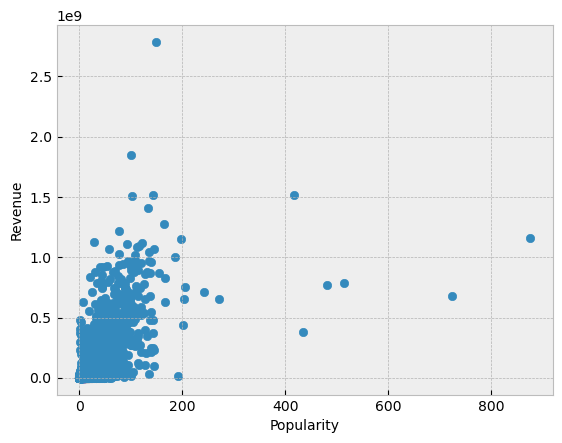

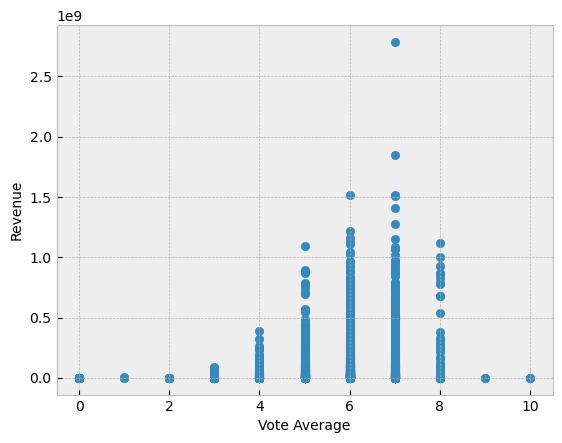

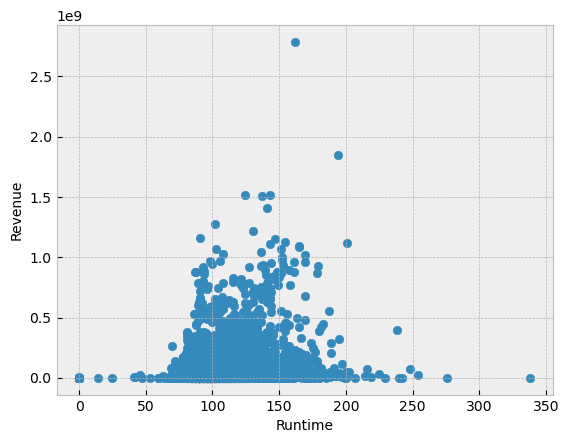

In [968]:
plt.scatter(popularity,revenue)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

plt.scatter(vote_average,revenue)
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.show()

plt.scatter(runtime,revenue)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()

In [969]:
input_features=['budget','popularity','runtime','vote_average','year']
revenue=['revenue']

In [970]:
train, test=train_test_split(movies_df, test_size=0.30, random_state=1)

In [971]:
test.head()

,title,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,year,movie_id,cast,crew
1296,Frankenweenie,39000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",27,"[{""name"": ""Tim Burton Productions"", ""id"": 8601}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-10-04,35287788,87,6,932,2012,62214,"[{""cast_id"": 20, ""character"": ""Victor Frankens...","[{""credit_id"": ""5488dcbd92514161d000031c"", ""de..."
4023,Garden State,2500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",30,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-07-28,26781723,102,7,618,2004,401,"[{""cast_id"": 1, ""character"": ""Andrew Largeman""...","[{""credit_id"": ""52fe423fc3a36847f800f449"", ""de..."
1653,Wicker Park,30000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",9,"[{""name"": ""Lakeshore Entertainment"", ""id"": 126...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-09-03,13001257,114,6,157,2004,11208,"[{""cast_id"": 1, ""character"": ""Matthew"", ""credi...","[{""credit_id"": ""52fe44119251416c75027b89"", ""de..."
4060,Friday the 13th: A New Beginning,2200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",12,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1985-03-22,21930418,92,5,196,1985,9731,"[{""cast_id"": 16, ""character"": ""Pam Roberts"", ""...","[{""credit_id"": ""52fe4523c3a36847f80bea15"", ""de..."
4735,Dude Where's My Dog?,0,"[{""id"": 10751, ""name"": ""Family""}]",0,[],[],2014-06-12,0,0,0,0,2014,272726,"[{""cast_id"": 6, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""592bed26c3a36877bc07a7e0"", ""de..."


In [972]:
x_train = train[input_features].dropna()
y_train = train[revenue].dropna()
x_test = test[input_features].dropna()
y_test = test[revenue].dropna()

In [973]:
def model_performance(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2=r2_score(true, predicted)
    return mae, rmse, r2

In [974]:
linReg=LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [975]:
y_lin_pred=linReg.predict(x_test)

In [976]:
mae, rmse, r2= model_performance(y_test, y_lin_pred)
print ("Linear Regression Performance: \n")
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 Score: ",r2*100)

Linear Regression Performance: 

RMSE:  95854145.03759503
MAE:  52703396.2171054
R2 Score:  67.27774226512014


In [977]:
#predict a value


## polynomial regression

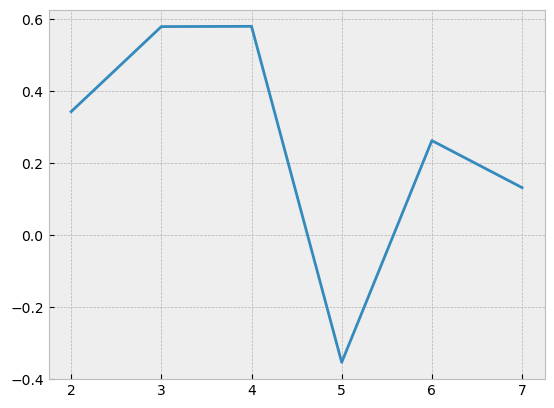

In [978]:
pol_scores=[]
for i in range(2,8):
    pol=PolynomialFeatures(degree=i)
    x_pol_train=pol.fit_transform(x_train)
    x_pol_test=pol.fit_transform(x_test)
    linReg.fit(x_pol_train, y_train)
    pol_scores.append(linReg.score(x_pol_test, y_test))
plt.plot(range(2,8), pol_scores)

In [979]:
pol=PolynomialFeatures(degree=4)
x_pol_train=pol.fit_transform(x_train)
x_pol_test=pol.fit_transform(x_test)

In [980]:
linReg.fit(x_pol_train, y_train)

LinearRegression()

In [981]:
y_pol_pred=linReg.predict(x_pol_test)

In [982]:
mae, rmse, r2= model_performance(y_test, y_pol_pred)
print ("Polynomial Regression Performance: \n")
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 Score: ",r2*100)

Polynomial Regression Performance: 

RMSE:  108793734.33501428
MAE:  55532564.84002636
R2 Score:  57.84692769080827


In [983]:
#predict a value


## scaling for knn

In [984]:
scaler=StandardScaler()
x_knn_train=scaler.fit_transform(x_train)
x_knn_test=scaler.transform(x_test)

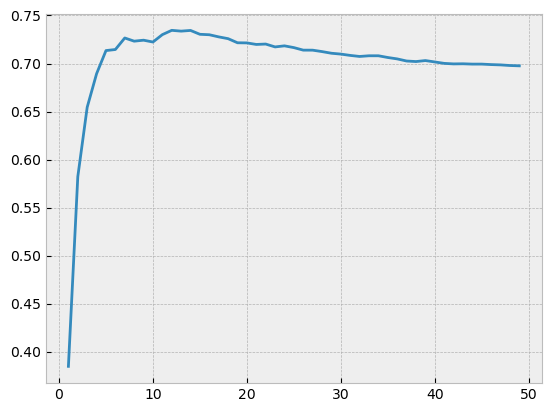

In [985]:
from sklearn.neighbors import KNeighborsRegressor
knn_scores=[]
for i in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_knn_train, y_train)
    knn_scores.append(knn.score(x_knn_test, y_test))
plt.plot(range(1,50), knn_scores)

In [986]:
knn=KNeighborsRegressor(n_neighbors=14)
knn.fit(x_knn_train, y_train)

KNeighborsRegressor(n_neighbors=14)

In [987]:
y_knn_pred=knn.predict(x_knn_test)

In [988]:
mae, rmse, r2= model_performance(y_test, y_knn_pred)
print ("K-Nearest Neighbours Regressor Performance: \n")
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 Score: ",r2*100)

K-Nearest Neighbours Regressor Performance: 

RMSE:  86357659.52083677
MAE:  43736922.63671914
R2 Score:  73.4402983487813
